### Analytics Cup 2024 - Max Script

#### **Set up**

In [1]:
# Installing the Packages

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting the Seed (pandas, statsmodels, matplotlib and y_data_profiling rely on numpy's random generator, and thus, we need to set the seed in numpy

seed = 2024
np.random.seed(seed)

In [3]:
# Importing the data 

diet_df = pd.read_csv("data/diet.csv")
recipes_df = pd.read_csv("data/recipes.csv")
requests_df = pd.read_csv("data/requests.csv")
reviews_df = pd.read_csv("data/reviews.csv")

/var/folders/9k/wnb2w84j2ybdcqgd0nlvwp640000gn/T/ipykernel_59686/2864751966.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv("data/reviews.csv")


#### **Data Exploration**

In [4]:
# Overview 

# One diet per AuthorId
# One recipe per RecipeId 
# Several requests per author (But only one request per author per recipe) 
# Several reviews per author (But only one review per author per recipe) 

# 1) Merged diets and reviews -> Dataset with reviews and diet information 
# 2) Merged (diets & reviews) with requests on AuthorId and RecipeId


#### Diet

In [5]:
# One Diet per Author 

In [6]:
diet_df.head()


,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61


In [7]:
# Diet
#diet_df.info() 
#sns.boxplot(diet_df);

duplicated_ids_count = diet_df['AuthorId'].duplicated().sum()
duplicated_ids_count

0

In [8]:
# Destinct Diets and their distribution. 
diet_count = diet_df['Diet'].value_counts()
print(diet_count)

Diet
Vegetarian    143383
Omnivore       78626
Vegan          49897
Name: count, dtype: int64


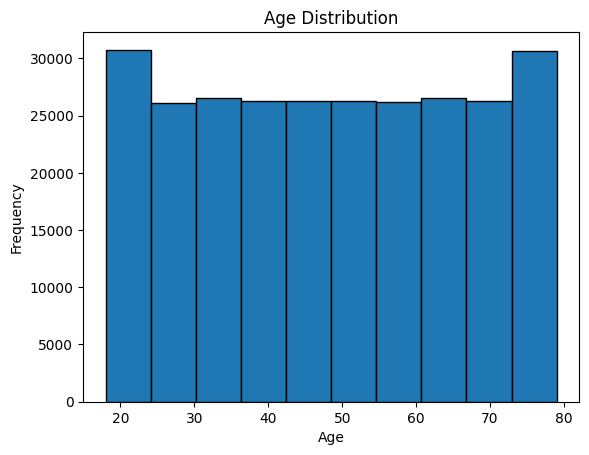

In [9]:
# Plotting the age distribution: 
age_data = diet_df['Age']
plt.hist(age_data, bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

##### Insights: 
- 3 Attributes
- In the diet column we have 1 row with a null value.
- Dummy encode the diets
- 



#### Recipes

In [39]:
recipes_df.head()

recipes_df['RecipeId'].duplicated().sum()
recipes_df

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,NaN
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.5,0.5,0.1,0.0,1175.1,22.2,7.8,0.6,7.9,NaN,NaN
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.2,25.8,10.7,197.9,435.5,51.9,7.5,7.2,50.1,NaN,NaN
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.9,9.2,3.6,78.3,725.9,7.3,1.1,1.7,26.7,2.0,NaN
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.8,80.3,69.3,0.0,294.7,369.0,15.7,317.9,26.7,NaN,1 gallon


#### Requests

In [11]:
# More than one request per author

In [12]:
requests_df.head()
# duplicated_ids_count = requests_df['AuthorId'].duplicated().sum()
# duplicated_ids_count

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.950949,0.0,Indifferent,0,0,0
1,437641B,365718,4201.820980,0.0,Yes,0,Indifferent,1
2,1803340263D,141757,6299.861496,0.0,Indifferent,1,Indifferent,0
3,854048B,280351,19801.365796,0.0,Yes,1,0,1
4,2277685E,180505,5400.093457,0.0,Indifferent,0,0,0


In [13]:
duplicate_combinations = requests_df.duplicated(subset=['AuthorId', 'RecipeId'])
duplicate_combinations.any()





False

#### Reviews

In [14]:
# More than 1 review per author

In [38]:


duplicated_ids_count = reviews_df['AuthorId'].duplicated().sum()
duplicated_ids_count

duplicate_combinations = reviews_df.duplicated(subset=['AuthorId', 'RecipeId'])
duplicate_combinations.any()

reviews_df

,AuthorId,RecipeId,Rating,Like,TestSetId
0,2492191A,33671,2.0,NaN,1.0
1,2002019979A,92647,2.0,NaN,2.0
2,408594E,161770,NaN,NaN,3.0
3,2001625557E,108231,2.0,NaN,4.0
4,2001427116E,71109,NaN,NaN,5.0
...,...,...,...,...,...
140190,999595E,338070,2.0,False,NaN
140191,999774A,29002,2.0,False,NaN
140192,999774A,159252,NaN,False,NaN
140193,999774A,1171,2.0,True,NaN


#### **Data Preparation**

In [16]:
# Preparing Diet Dataset

diet_dummy_df = pd.get_dummies(diet_df['Diet'], drop_first=True)
diet_dummy_df

,Vegan,Vegetarian
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
271902,False,True
271903,False,False
271904,False,True
271905,False,True


In [29]:
# Merging reviews and diets
review_diet_df = pd.merge(reviews_df, diet_df, on="AuthorId")

# Merging (reviews & diets) with requests on AuthorId and RecipeId
review_diet_requests_df = pd.merge(review_diet_df, requests_df, on=["AuthorId", "RecipeId"])

# Merging (reviews, diets & requests) with recipes 
full_df = pd.merge(review_diet_requests_df, recipes_df, on="RecipeId")
full_df

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Time,HighCalories,HighProtein,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,2492191A,33671,2.0,NaN,1.0,Omnivore,19,2698.714376,0.0,Indifferent,...,37.8,17.1,96.6,1280.4,97.1,17.7,9.4,41.0,4.0,NaN
1,1054649A,33671,NaN,NaN,518.0,Omnivore,43,2698.953218,1.0,Yes,...,37.8,17.1,96.6,1280.4,97.1,17.7,9.4,41.0,4.0,NaN
2,1332021D,33671,2.0,NaN,614.0,Omnivore,59,2699.449076,1.0,Indifferent,...,37.8,17.1,96.6,1280.4,97.1,17.7,9.4,41.0,4.0,NaN
3,527011D,33671,2.0,NaN,635.0,Omnivore,51,2700.372697,0.0,Indifferent,...,37.8,17.1,96.6,1280.4,97.1,17.7,9.4,41.0,4.0,NaN
4,945540E,33671,NaN,NaN,712.0,Omnivore,22,2697.940249,0.0,Indifferent,...,37.8,17.1,96.6,1280.4,97.1,17.7,9.4,41.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140190,998666C,215821,2.0,False,NaN,Vegetarian,51,1198.343216,0.0,Yes,...,5.7,3.4,17.1,331.5,8.5,1.8,0.9,4.1,NaN,10 people
140191,999325C,41275,2.0,False,NaN,Omnivore,60,7200.236450,0.0,Indifferent,...,53.0,19.6,127.4,2365.5,40.1,7.6,11.5,27.5,NaN,NaN
140192,999521E,55333,NaN,True,NaN,Vegan,64,4801.128176,1.0,Yes,...,19.8,2.7,0.0,4542.3,149.3,40.4,28.7,62.0,NaN,NaN
140193,999595E,338070,2.0,False,NaN,Vegetarian,31,3899.421310,0.0,Indifferent,...,31.4,15.0,99.8,391.7,43.1,1.4,27.3,5.2,16.0,NaN


In [24]:
full_df[full_df['AuthorId'] == '2492191A']

KeyError: 'AuthorId'

In [34]:
column_types = full_df.dtypes
column_types
full_df.loc[full_df["AuthorId"] == '1930181E']

,AuthorId,RecipeId,Rating,Like,TestSetId,Diet,Age,Time,HighCalories,HighProtein,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
1173,1930181E,333876,2.0,NaN,42244.0,Vegetarian,56,2398.930886,0.0,Yes,...,24.4,8.0,106.1,340.4,5.3,1.2,1.4,28.8,4.0,NaN
2015,1930181E,132765,2.0,NaN,41868.0,Vegetarian,56,5398.574112,1.0,Indifferent,...,18.3,11.1,93.4,151.7,57.5,1.0,27.9,6.4,NaN,1 tart
5251,1930181E,198707,NaN,NaN,42301.0,Vegetarian,56,1198.886383,0.0,Yes,...,11.1,1.6,23.3,621.9,15.1,3.5,10.6,2.1,8.0,NaN
7637,1930181E,128566,2.0,NaN,41928.0,Vegetarian,56,1201.161836,0.0,Indifferent,...,12.2,6.3,29.9,208.6,21.9,0.2,13.9,2.2,NaN,24 cookies
12508,1930181E,47195,NaN,NaN,41637.0,Vegetarian,56,11998.231005,0.0,Indifferent,...,31.7,11.2,112.2,696.3,27.4,1.8,3.5,24.6,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83535,1930181E,353757,2.0,NaN,42474.0,Vegetarian,56,3599.908906,0.0,Yes,...,234.0,31.4,0.0,3583.5,330.2,43.0,231.4,83.2,NaN,1 pound
83538,1930181E,334652,2.0,NaN,42475.0,Vegetarian,56,47399.940892,1.0,Yes,...,8.6,2.6,279.4,2992.4,78.1,3.8,3.1,20.2,NaN,NaN
83539,1930181E,379381,NaN,NaN,42477.0,Vegetarian,56,480.309653,0.0,Indifferent,...,3.9,1.3,4.9,147.1,7.2,3.6,0.7,4.3,6.0,NaN
83540,1930181E,191000,NaN,NaN,42478.0,Vegetarian,56,1200.971634,0.0,Yes,...,47.6,26.4,203.1,1561.2,81.8,3.9,3.6,44.2,4.0,NaN


In [19]:
full_df = full_df.select_dtypes(include=['int', 'float'])
full_df = full_df.dropna()

In [20]:
# Sampling 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(full_df.iloc[:, :-1], full_df.iloc[:, -1:],
                   test_size=0.3, 
                   shuffle=True,
                   random_state=3)

In [21]:
# Modeling 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score




# Logistic Regression 
from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression(max_iter=30)

model_logistic_regression.fit(X_train, y_train) 






/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=30)

In [22]:
y_pred = model_logistic_regression.predict(X_test)
y_pred

accuracy = balanced_accuracy_score(y_test, y_pred)
accuracy

0.02205409682231485